D:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


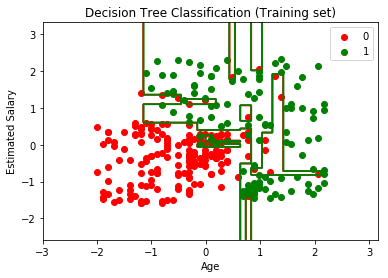

In [3]:
#导入数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasets = pd.read_csv('Social_Network_Ads.csv')
#datasets.head()

#设置特征变量和特征值
X = datasets.iloc[:,2:4].values
y = datasets.iloc[:,4].values

#划分数据集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 0)

#特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#利用决策树训练模型
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

#预测模型
y_pred = classifier.predict(X_test)

#评估模型
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

#可视化训练集
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),#ravel()--将多维数组转换为一维数组
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.plot()
plt.show()
#可视化测试集

D:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


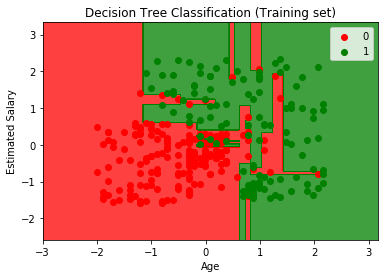

In [2]:
#导入数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasets = pd.read_csv('Social_Network_Ads.csv')
#datasets.head()

#设置特征变量和特征值
X = datasets.iloc[:,2:4].values
y = datasets.iloc[:,4].values

#划分数据集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 0)

#特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#利用决策树训练模型
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

#预测模型
y_pred = classifier.predict(X_test)

#评估模型
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

#可视化训练集
#1.转换成网格数据
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.linspace(X_set[:,0].min()-1,X_set[:,0].max()+1,1000),
                   np.linspace(X_set[:,1].min()-1,X_set[:,1].max()+1,1000))

#2.画等高线图
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green')))
#3.画散点图
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)

#4.装饰坐标轴
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.plot()
plt.show()
            

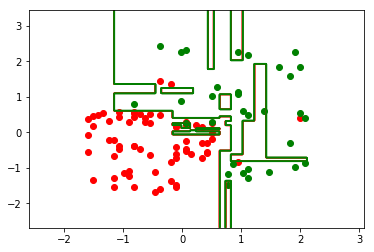

In [21]:
#将测试集结果可视化
x_set,y_set = X_test,y_test
plt.scatter(x_set[y_set == 0,0],x_set[y_set == 0,1],c ='r')
plt.scatter(x_set[y_set == 1,0],x_set[y_set == 1,1],c ='g')
#做等高线图
X3, X4 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
#X3，X4 = np.meshgrid(np.arange(x_set[:,0].min() - 1,x_set[:,0].max() + 1, 0.01),
                     #np.arange(x_set[:,1].min() - 1,x_set[:,1].max() + 1, 0.01))  #生成网格数据
plt.contour(X3,X4,classifier.predict(np.array([X3.ravel(),X4.ravel()]).T).reshape(X3.shape),cmap = ListedColormap(('red','green')))
#
plt.plot()
plt.show()